In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df=pd.read_csv('schedule.csv')
#df.set_index("activity", inplace = True)
df.tail(10)

,start,end,activity
4,4,5,sleep
5,5,6,sleep
6,6,7,sleep
7,7,8,sleep
8,9,10,exercise
9,11,12,lecture
10,13,14,lunch
11,15,16,project
12,18,19,playing
13,21,22,studying


In [3]:
df['duration']=df['end']-df['start']
free_hours = pd.DataFrame({'hour': range(0,25)})
df['start_hour'] = (df['start'] - 1) / (23) * 23 + 1
df['end_hour'] = (df['end'] - 1) / (23) * 23 + 1
df1 = pd.merge(df, free_hours,how='right', left_on='start_hour', right_on='hour')
#df2=pd.merge(df)
df1 = df1.sort_values('hour')
df1['free_hours'] = df1['activity'].isna()
#df.head()
#free_hours.head()
df1.head(24)

,start,end,activity,duration,start_hour,end_hour,hour,free_hours
0,0.0,1.0,sleep,1.0,0.0,1.0,0,False
1,1.0,2.0,sleep,1.0,1.0,2.0,1,False
2,2.0,3.0,sleep,1.0,2.0,3.0,2,False
3,3.0,4.0,sleep,1.0,3.0,4.0,3,False
4,4.0,5.0,sleep,1.0,4.0,5.0,4,False
5,5.0,6.0,sleep,1.0,5.0,6.0,5,False
6,6.0,7.0,sleep,1.0,6.0,7.0,6,False
7,7.0,8.0,sleep,1.0,7.0,8.0,7,False
8,NaN,NaN,NaN,NaN,NaN,NaN,8,True
9,9.0,10.0,exercise,1.0,9.0,10.0,9,False


In [4]:
data=pd.read_csv('activities.csv');
data.head(15)

,time_of_day,location,current_activity,next_activity
0,7,hostel,sleep,breakfast
1,8,hostel,sleep,breakfast
2,9,hostel,sleep,breakfast
3,10,hostel,free,lecture
4,11,Bdome,lecture,lecture
5,8,mess,breakfast,sleep
6,9,mess,breakfast,lecture
7,10,Bdome,lecture,lecture
8,11,dside,lecture,free
9,9,bdome,lecture,library


In [5]:
from sklearn.preprocessing import LabelEncoder
le_1=LabelEncoder()
le_2=LabelEncoder()
le_3=LabelEncoder()
data['location_n']=le_1.fit_transform(data['location'])
data['current_activity_n']=le_2.fit_transform(data['current_activity'])
data['next_activity_n']=le_3.fit_transform(data['next_activity'])
Y=data['next_activity_n']
X=data[['time_of_day','location_n','current_activity_n']]
#data.drop(['next_activity','next_activity_n'],axis='columns',inplace= true)
print(X)
print(Y)
data.head()

    time_of_day  location_n  current_activity_n
0             7          11                   9
1             8          11                   9
2             9          11                   9
3            10          11                   2
4            11           0                   5
..          ...         ...                 ...
92            1           3                   9
93            2           3                   9
94            3           3                   9
95            4           3                   9
96            5           3                   9

[97 rows x 3 columns]
0      1
1      1
2      1
3      7
4      7
      ..
92    12
93    12
94    12
95    12
96    12
Name: next_activity_n, Length: 97, dtype: int32


,time_of_day,location,current_activity,next_activity,location_n,current_activity_n,next_activity_n
0,7,hostel,sleep,breakfast,11,9,1
1,8,hostel,sleep,breakfast,11,9,1
2,9,hostel,sleep,breakfast,11,9,1
3,10,hostel,free,lecture,11,2,7
4,11,Bdome,lecture,lecture,0,5,7


In [42]:
# X=new_df[['time_of_day','location','current_activity']].values
# Y=new_df.next_activity
# from sklearn.compose import ColumnTransformer
# ct=ColumnTransformer([("location",OneHotEncoder(),[1]),("current_activity",OneHotEncoder(),[2])],remainder='passthrough')
# #ohe=OneHotEncoder(categorical_features=[1,2])
# X=ct.fit_transform(X)
# print(X.shape)
# X
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
model=RandomForestClassifier()
model.fit(X_train,y_train)
print('Accuracy of the model is {}%'.format(model.score(X_test,y_test)*100))

Accuracy of the model is 75.0%


AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

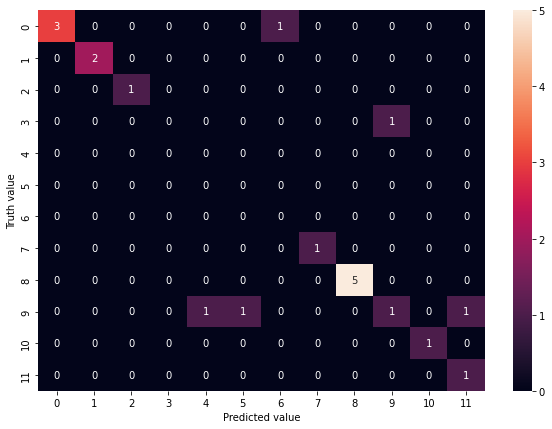

In [43]:
from sklearn.metrics import confusion_matrix
y_predicted=model.predict(X_test)
mat=confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(10,7))
sns.heatmap(mat,annot=True)
plt.xlabel('Predicted value')
plt.ylabel('Truth value')
X=X.to_numpy()

In [17]:
def get_score(model,X_train,X_test,Y_train,Y_test):
    model.fit(X_train,Y_train)
    return model.score(X_test,Y_test)

In [44]:
print("Logistic Regression :{}".format(get_score(LogisticRegression(),X_train,X_test,y_train,y_test)))
print("SVM :{}".format(get_score(SVC(),X_train,X_test,y_train,y_test)))
print("Random forest :{}".format(get_score(RandomForestClassifier(),X_train,X_test,y_train,y_test)))

c:\users\ashu9\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression :0.55
SVM :0.55
Random forest :0.75


In [45]:
from sklearn.model_selection import KFold
folds=KFold(n_splits=10)
scores_lr=[]
scores_svm=[]
scores_rf=[]
for train_index,test_index in folds.split(X):
    X1_train,X1_test,Y1_train,Y1_test=X[train_index],X[test_index],Y[train_index],Y[test_index]
    scores_lr.append(get_score(LogisticRegression(),X1_train,X1_test,Y1_train,Y1_test))
    scores_svm.append(get_score(SVC(),X1_train,X1_test,Y1_train,Y1_test))
    scores_rf.append(get_score(RandomForestClassifier(),X1_train,X1_test,Y1_train,Y1_test))
print(scores_lr)
print(scores_svm)
print(scores_rf)

c:\users\ashu9\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ashu9\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

[0.0, 0.4, 0.3, 0.3, 0.3, 0.4, 0.6, 0.5555555555555556, 0.4444444444444444, 0.7777777777777778]
[0.0, 0.4, 0.3, 0.4, 0.5, 0.4, 0.6, 0.5555555555555556, 0.3333333333333333, 1.0]
[0.3, 0.0, 0.0, 0.3, 0.8, 0.7, 0.9, 0.6666666666666666, 0.6666666666666666, 1.0]
